In [26]:
!pip install IndicTransToolkit

ERROR: Could not find a version that satisfies the requirement IndicTransToolkit (from versions: none)
ERROR: No matching distribution found for IndicTransToolkit


In [7]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.9 MB/s eta 0:00:00


In [1]:
!pip install sacrebleu
!pip install sacremoses
import pandas as pd
from transformers.optimization import Adafactor
from transformers import get_constant_schedule_with_warmup
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import numpy as np
from tqdm.auto import tqdm, trange
import random
import os
from torch import nn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 14.6 MB/s eta 0:00:00


In [39]:
df = pd.read_csv("/content/translated (2).csv")
df

,input,output
0,"माफ करीं, लेकिन हमरा लगे एप्सन एफ7100 के बारे ...","क्षमा करें, लेकिन मुझे एप्सन एफ7100 के बारे मे..."
1,बिल्ली के बच्चा - संज्ञा\nअक्सर - क्रियाविशेषण...,बिल्ली के बच्चे - संज्ञा अक्सर क्रियाविशेषण को...
2,इहाँ एगो बेतरतीब तरीका से जनरेट कइल गइल 8-अक्ष...,यहां एक बेतरतीब तरीके से उत्पन्न 8-अक्षर वाला ...
3,"वेब पेज पर रोबोटिक्स के परिचय होखे के चाहीं, ज...","वेब पेज पर रोबोटिक्स की शुरूआत होनी चाहिए, जिस..."
4,सोशल मीडिया पर सभसे ढेर साझा कइल जाए वाली सामग...,सोशल मीडिया पर सबसे ज्यादा शेयर की जाने वाली स...
...,...,...
495,"माफ करीं, बाकिर हम रउरा सभे के खाली ऐस प्रिंटर...","क्षमा करें, लेकिन हम आप सभी के खाली एएस प्रिंट..."
496,सोफा से शार्पी पेन निकाले के सबसे उपयुक्त उपाय...,सोफे से शार्पी पेन निकालने का सबसे उपयुक्त उपा...
497,कई गो कारण हो सकेला कि कवनो नियोक्ता के कवनो क...,कई कारण हो सकते हैं कि किसी नियोक्ता को किसी क...
498,"""कर्म शब्द से अधिका जोर से बोलेला"" मुहावरा एगो...","""कर्म शब्द से अधिक जोर से बोलेला"" मुहावरा एक प..."


In [40]:

df = df.rename(columns={'input': 'bho','output':'hi_IN'})
df



,bho,hi_IN
0,"माफ करीं, लेकिन हमरा लगे एप्सन एफ7100 के बारे ...","क्षमा करें, लेकिन मुझे एप्सन एफ7100 के बारे मे..."
1,बिल्ली के बच्चा - संज्ञा\nअक्सर - क्रियाविशेषण...,बिल्ली के बच्चे - संज्ञा अक्सर क्रियाविशेषण को...
2,इहाँ एगो बेतरतीब तरीका से जनरेट कइल गइल 8-अक्ष...,यहां एक बेतरतीब तरीके से उत्पन्न 8-अक्षर वाला ...
3,"वेब पेज पर रोबोटिक्स के परिचय होखे के चाहीं, ज...","वेब पेज पर रोबोटिक्स की शुरूआत होनी चाहिए, जिस..."
4,सोशल मीडिया पर सभसे ढेर साझा कइल जाए वाली सामग...,सोशल मीडिया पर सबसे ज्यादा शेयर की जाने वाली स...
...,...,...
495,"माफ करीं, बाकिर हम रउरा सभे के खाली ऐस प्रिंटर...","क्षमा करें, लेकिन हम आप सभी के खाली एएस प्रिंट..."
496,सोफा से शार्पी पेन निकाले के सबसे उपयुक्त उपाय...,सोफे से शार्पी पेन निकालने का सबसे उपयुक्त उपा...
497,कई गो कारण हो सकेला कि कवनो नियोक्ता के कवनो क...,कई कारण हो सकते हैं कि किसी नियोक्ता को किसी क...
498,"""कर्म शब्द से अधिका जोर से बोलेला"" मुहावरा एगो...","""कर्म शब्द से अधिक जोर से बोलेला"" मुहावरा एक प..."


In [41]:
target_lang = 'bho'
src_lang = 'hi_IN'

In [42]:
import pandas as pd
import re
import unicodedata
from indicnlp.tokenize import indic_tokenize  # Correct import for Indic tokenization

def normalize_text(text):
    """
    Normalize Devanagari text (Hindi/Bhojpuri):
    - Standardize punctuation and whitespace.
    - Preserve numerals (both Arabic 0-9 and Devanagari ०-९).
    - Unicode normalization (NFC).
    """
    # Normalize Unicode (NFC form for consistent glyphs)
    text = unicodedata.normalize('NFC', text.strip())

    # Standardize Devanagari punctuation (e.g., replace multiple '।' with one)
    text = re.sub(r'[।]+', '।', text)

    # Remove extra spaces (but preserve numerals)
    text = re.sub(r'\s+', ' ', text)

    return text

def remove_noise(text):
    """
    Remove HTML, URLs, and non-text symbols but preserve:
    - Devanagari script (\u0900-\u097F)
    - Arabic numerals (0-9)
    - Devanagari numerals (०-९)
    - Basic punctuation (।, ,, ?, !)
    """
    # Keep Devanagari, numerals, and selected punctuation
    text = re.sub(
        r'[^\u0900-\u097F0-9०-९।,!?\s]',
        '',
        text
    )
    # Remove HTML/URLs
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    return text

def count_words(text):
    """Count words using Indic tokenizer (ignores numerals as separate words)."""
    return len(indic_tokenize.trivial_tokenize(text))  # Fixed tokenizer function

def preprocess(df, src_lang='hindi', target_lang='bhojpuri', max_words=300, min_words=3):
    """
    Preprocess parallel Hindi-Bhojpuri data:
    - Normalize, clean, and filter by sentence length.
    - Preserves numerals in both scripts.
    """
    # Normalize both columns
    df[src_lang] = df[src_lang].apply(normalize_text)
    df[target_lang] = df[target_lang].apply(normalize_text)

    # Remove noise (preserving numerals)
    df[src_lang] = df[src_lang].apply(remove_noise)
    df[target_lang] = df[target_lang].apply(remove_noise)

    # Filter by sentence length (word count)
    if max_words is not None:
        df = df[df[src_lang].apply(lambda x: min_words <= count_words(x) <= max_words)]
        df = df[df[target_lang].apply(lambda x: min_words <= count_words(x) <= max_words)]

    # Drop duplicates and reset index
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    return df
# Example usage:
df = preprocess(df, src_lang=src_lang, target_lang=target_lang)
print(len(df))

437


In [43]:
df

,bho,hi_IN
0,"माफ करीं, लेकिन हमरा लगे एप्सन एफ7100 के बारे ...","क्षमा करें, लेकिन मुझे एप्सन एफ7100 के बारे मे..."
1,बिल्ली के बच्चा संज्ञा अक्सर क्रियाविशेषण के...,बिल्ली के बच्चे संज्ञा अक्सर क्रियाविशेषण को ...
2,इहाँ एगो बेतरतीब तरीका से जनरेट कइल गइल 8अक्षर...,यहां एक बेतरतीब तरीके से उत्पन्न 8अक्षर वाला प...
3,"वेब पेज पर रोबोटिक्स के परिचय होखे के चाहीं, ज...","वेब पेज पर रोबोटिक्स की शुरूआत होनी चाहिए, जिस..."
4,पाठ के मुख्य बिचार ई बा कि रोबोटिक्स इंडस्ट्री...,इस विषय पर मुख्य विचार यह है कि रोबोटिक्स उद्य...
...,...,...
432,"माफ करीं, बाकिर हम रउरा सभे के खाली ऐस प्रिंटर...","क्षमा करें, लेकिन हम आप सभी के खाली एएस प्रिंट..."
433,सोफा से शार्पी पेन निकाले के सबसे उपयुक्त उपाय...,सोफे से शार्पी पेन निकालने का सबसे उपयुक्त उपा...
434,कई गो कारण हो सकेला कि कवनो नियोक्ता के कवनो क...,कई कारण हो सकते हैं कि किसी नियोक्ता को किसी क...
435,कर्म शब्द से अधिका जोर से बोलेला मुहावरा एगो ज...,कर्म शब्द से अधिक जोर से बोलेला मुहावरा एक प्र...



Sentence Length Statistics:
Language      Mean  Median  Max
   hi_IN 72.073227    50.0  190
     bho 89.123570    51.0  299


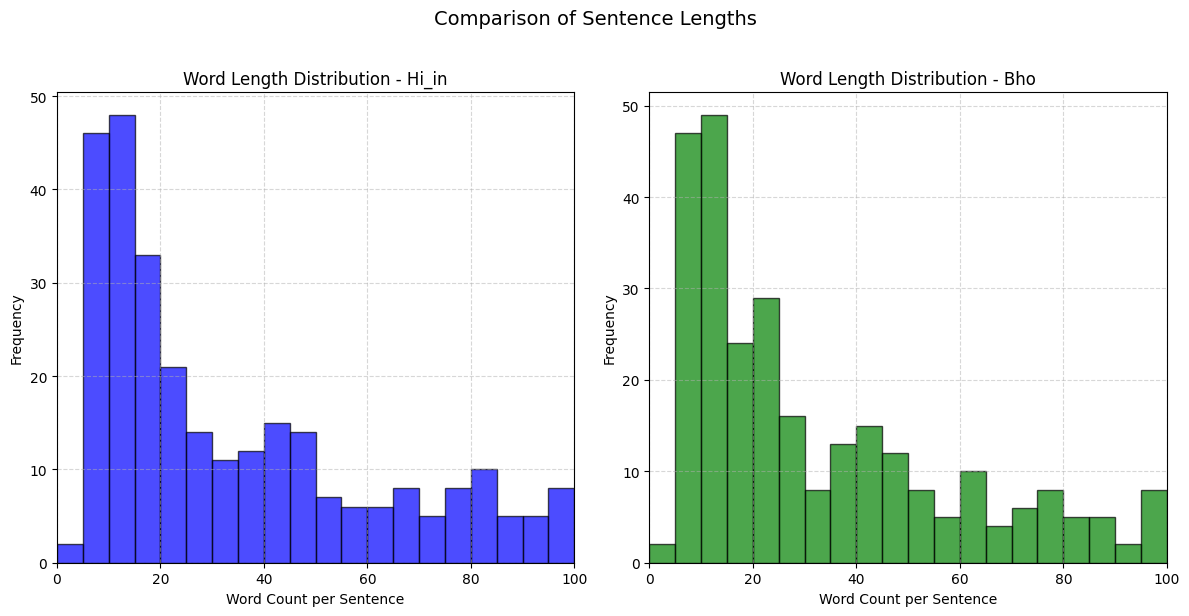

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from indicnlp.tokenize import indic_tokenize  # For accurate Indic language word tokenization


# Calculate word lengths using proper Indic tokenization
df['word_length_col1'] = df[src_lang].apply(lambda x: len(indic_tokenize.trivial_tokenize(x)))
df['word_length_col2'] = df[target_lang].apply(lambda x: len(indic_tokenize.trivial_tokenize(x)))

# Create figure with two subplots
plt.figure(figsize=(12, 6))

# Plot for source language (Hindi)
plt.subplot(1, 2, 1)
plt.hist(df['word_length_col1'], bins=range(0, 101, 5), color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Word Count per Sentence')
plt.ylabel('Frequency')
plt.title(f'Word Length Distribution - {src_lang.capitalize()}')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 100)

# Plot for target language (Bhojpuri)
plt.subplot(1, 2, 2)
plt.hist(df['word_length_col2'], bins=range(0, 101, 5), color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Word Count per Sentence')
plt.ylabel('Frequency')
plt.title(f'Word Length Distribution - {target_lang.capitalize()}')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 100)

# Add overall title
plt.suptitle('Comparison of Sentence Lengths', y=1.02, fontsize=14)

# Calculate and display basic statistics
stats_df = pd.DataFrame({
    'Language': [src_lang, target_lang],
    'Mean': [df['word_length_col1'].mean(), df['word_length_col2'].mean()],
    'Median': [df['word_length_col1'].median(), df['word_length_col2'].median()],
    'Max': [df['word_length_col1'].max(), df['word_length_col2'].max()]
})

print("\nSentence Length Statistics:")
print(stats_df.to_string(index=False))

# Clean up
df.drop(['word_length_col1', 'word_length_col2'], axis=1, inplace=True)
plt.tight_layout()
plt.show()

In [45]:
!git clone https://github.com/VarunGumma/IndicTransToolkit
!cd IndicTransToolkit

!pip install --editable . --use-pep517 # required for pip >= 25.0

# in case it fails, try:
# pip install --editable . --use-pep517 --config-settings editable_mode=compat

fatal: destination path 'IndicTransToolkit' already exists and is not an empty directory.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [46]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50", src_lang="hi_IN", tgt_lang="bho")



In [47]:

if target_lang not in  tokenizer.additional_special_tokens:
    new_special_tokens = tokenizer.additional_special_tokens + [target_lang]
    tokenizer.add_special_tokens({'additional_special_tokens': new_special_tokens})
    print(target_lang," not present in model")
if src_lang not in  tokenizer.additional_special_tokens:
    new_special_tokens = tokenizer.additional_special_tokens + [src_lang]
    tokenizer.add_special_tokens({'additional_special_tokens': new_special_tokens})
    print(src_lang," not present in model")

bho  not present in model


In [48]:
#cheaks for number of unk in tokens

texts_with_unk = [
    text for text in tqdm(df[target_lang])
    if tokenizer.unk_token_id in tokenizer(text).input_ids
]
print(len(texts_with_unk))

  0%|          | 0/437 [00:00<?, ?it/s]

0


In [49]:
import re
import sys
import unicodedata
from sacremoses import MosesPunctNormalizer

mpn = MosesPunctNormalizer(lang="en")
mpn.substitutions = [
    (re.compile(r), sub) for r, sub in mpn.substitutions
]

def get_non_printing_char_replacer(replace_by: str = " "):
    non_printable_map = {
        ord(c): replace_by
        for c in (chr(i) for i in range(sys.maxunicode + 1))
        # same as \p{C} in perl
        # see https://www.unicode.org/reports/tr44/#General_Category_Values
        if unicodedata.category(c) in {"C", "Cc", "Cf", "Cs", "Co", "Cn"}
    }

    def replace_non_printing_char(line) -> str:
        return line.translate(non_printable_map)

    return replace_non_printing_char

replace_nonprint = get_non_printing_char_replacer(" ")

def preproc(text):
    clean = mpn.normalize(text)
    clean = replace_nonprint(clean)
    # replace 𝓕𝔯𝔞𝔫𝔠𝔢𝔰𝔠𝔞 by Francesca
    clean = unicodedata.normalize("NFKC", clean)
    return clean

In [50]:
texts_with_unk_normed = [
    text for text in tqdm(texts_with_unk)
    if tokenizer.unk_token_id in tokenizer(preproc(text)).input_ids
]
print(len(texts_with_unk_normed))

0it [00:00, ?it/s]

0


In [37]:
src_lang = 'hi_IN'

In [51]:
import random
LANGS = [(src_lang,src_lang), (target_lang, target_lang)]
def get_batch_pairs(batch_size, data=df):
    (l1, long1), (l2, long2) = (src_lang, src_lang),(target_lang, target_lang)
    xx, yy = [], []
    for _ in range(batch_size):
        item = data.iloc[random.randint(0, len(data)-1)]
        xx.append(preproc(item[l1]))
        yy.append(preproc(item[l2]))
    return xx, yy, long1, long2

print(get_batch_pairs(1))


(['डॉकर कंटेनर एक कार्यकारी सॉफ्टवेयर पैकेज है जिसमें सभी निर्भरताएं, पुस्तकालय और कॉन्फ़िगरेशन फाइलें हैं जिनकी आवश्यकताएं हैं ताकि वे किसी भी प्लेटफॉर्म पर चल सकें। यह सॉफ्टवेयर कोड का हल्का और स्टैंडअलोन एन्कैप्सुलेशन है जिसे होस्ट ऑपरेटिंग सिस्टम के कर्नेल और संसाधनों को साझा करने के लिए इंजन अनुकूलित किया गया है। डॉकर कंटेनर कंटेनराइजेशन की अवधारणा का उपयोग सिस्टम के लिए किया जाता है, जहां अंतर्निहित होस्टिंग एप्लिकेशन भाड़े सेवाएं हैं जिनसे विभिन्न होस्टिंग प्लेटफार्मों से अलगअलग चलना की अनुमति मिलती है। प्रत्येक कंटेनर को अपने तरीके से बनाया जाता है, जिसमें सभी प्रकार के ऑपरेटिंग सिस्टम के वातावरण, सीपीयू के जोखिम, मेटेनर और अन्य उपकरणों के संचालन में भी सुधार होता है। यह एक बहुत ही सरल प्रणाली है जिसमें सभी उपकरणों के साथ एक अच्छा संचार करने'], ['डॉकर कंटेनर एगो एक्जीक्यूटिव सॉफ्टवेयर पैकेज हवे जेह में ऊ सगरी निर्भरता, लाइब्रेरी आ कॉन्फ़िगरेशन फाइल होलीं जिनहन के जरूरत पड़ी जेह से कि ऊ कवनो भी प्लेटफार्म पर चले में सक्षम हो सके। ई सॉफ्टवेयर कोड के हल्का आ स्टैंडअलोन एनकैप्सुलेश

In [52]:
import gc
import torch
def cleanup():
    """Try to free GPU memory"""
    gc.collect()
    torch.cuda.empty_cache()

In [53]:
def translate(
    text, src_lang=src_lang, tgt_lang=target_lang,
    a=32, b=3, max_input_length=100, num_beams=4, **kwargs
):
    """Turn a text or a list of texts into a list of translations"""
    tokenizer.src_lang = src_lang
    tokenizer.tgt_lang = tgt_lang
    inputs = tokenizer(
        text, return_tensors='pt', padding=True, truncation=True,
        max_length=max_input_length
    )
    model.eval() # turn off training mode
    result = model.generate(
        **inputs.to(model.device),
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_new_tokens=int(a + b * inputs.input_ids.shape[1]),
        num_beams=num_beams, **kwargs
    )
    return tokenizer.batch_decode(result, skip_special_tokens=True)[0]


In [54]:
batch_size = 16
max_length = 100# token sequences will be truncated
training_steps = 10000

MODEL_SAVE_PATH = '/content/save'

In [56]:
# prompt: device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")


Using device: cpu


In [57]:
import sacrebleu
bleu_calc = sacrebleu.BLEU()
chrf_calc = sacrebleu.CHRF(word_order=2)  # this metric is called ChrF++
bleu = []
chrf = []
losses  = []

'''DEFINE MODEL AND OPTIMIZERS'''
model.to(device);
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad],
    scale_parameter=False,
    relative_step=False,
    lr=1e-4,
    clip_threshold=1.0,
    weight_decay=1e-3,
    )
scheduler = get_constant_schedule_with_warmup(optimizer, num_warmup_steps=1000)


'''START TRAINING'''
model.train()
x, y, loss = None, None, None
cleanup()
tq = trange(0, training_steps)
for i in tq:
    xx, yy, lang1, lang2 = get_batch_pairs(batch_size,df)
    try:
        tokenizer.src_lang = lang1
        x = tokenizer(xx, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)
        tokenizer.src_lang = lang2
        y = tokenizer(yy, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)
        # -100 is a magic value ignored in the loss function
        # because we don't want the model to learn to predict padding ids
        y.input_ids[y.input_ids == tokenizer.pad_token_id] = -100

        loss = model(**x, labels=y.input_ids).loss
        loss.backward()
        losses.append(loss.item())

        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        scheduler.step()

    except RuntimeError as e:  # usually, it is out-of-memory
        optimizer.zero_grad(set_to_none=True)
        x, y, loss = None, None, None
        cleanup()
        print('error', max(len(s) for s in xx + yy), e)
        continue

    if i % 1000 == 0:
        # each 1000 steps, I report average loss at these steps
        print(i, np.mean(losses[-1000:]))

'''SAVE AND VALIDATION'''
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

model.eval()
tqdm.pandas(desc="Applying function")
val_df[target_lang + '_translated'] = val_df[src_lang].progress_apply(translate)
val_df.to_csv(f'/kaggle/working/eval.csv', index=False)
val_df.to_excel(f'/kaggle/working/eval.xlsx', index=False)
b = bleu_calc.corpus_score(val_df[target_lang + '_translated'].tolist(), [val_df[target_lang].tolist()])
c = chrf_calc.corpus_score(val_df[target_lang + '_translated'].tolist(), [val_df[target_lang].tolist()])
print(f'BLEU SCORE : '+str(b.score))
print(f'CHRF SCORE : '+str(c.score))


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 